In [122]:
import pandas as pd
import numpy as np
import missingno as msno
df = pd.read_csv('Products.csv')
pd.set_option('display.max_columns', None)
# pd.set_option("display.width", 200)
# df = pd.read_csv('Products.csv', names = ['Number', 'Product ID', 'Product Name', 'Category', 'Description', 'Price', 'Location', 'Product URL', 'Page ID', 'Date Posted'])
print(df.shape)
df.info()
df.head(12)

(11318, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11318 entries, 0 to 11317
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           11195 non-null  object 
 1   id                   8001 non-null   object 
 2   product_name         8001 non-null   object 
 3   category             8001 non-null   object 
 4   product_description  8001 non-null   object 
 5   price                7156 non-null   object 
 6   location             6311 non-null   object 
 7   url                  6311 non-null   object 
 8   page_id              6311 non-null   float64
 9   create_time          6311 non-null   object 
dtypes: float64(1), object(9)
memory usage: 884.3+ KB


,Unnamed: 0,id,product_name,category,product_description,price,location,url,page_id,create_time
0,0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire",https://www.gumtree.com/p/mirrors-clocks-ornam...,1.426705e+09,2022-02-26
1,1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland",https://www.gumtree.com/p/other-household-good...,1.426705e+09,2022-02-26
2,2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire",https://www.gumtree.com/p/outdoor-settings-fur...,1.426705e+09,2022-02-26
3,3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset",https://www.gumtree.com/p/other-dining-living-...,1.426705e+09,2022-02-26
4,4,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,NaN,NaN,NaN,NaN,NaN
5,👉 Factory Sell Price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,👉New Amazing Design,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,👉 Shannon Sofa Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,👉2 Seater or 3 Seater Sofa Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,👉3+2 Seater Sofa Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,id,product_name,category,product_description,price,location,url,page_id,create_time
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire",https://www.gumtree.com/p/mirrors-clocks-ornam...,1.426705e+09,2022-02-26
1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland",https://www.gumtree.com/p/other-household-good...,1.426705e+09,2022-02-26
2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire",https://www.gumtree.com/p/outdoor-settings-fur...,1.426705e+09,2022-02-26
3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset",https://www.gumtree.com/p/other-dining-living-...,1.426705e+09,2022-02-26
4,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,NaN,NaN,NaN,NaN,NaN


In [124]:
df.rename({'category':'category1', 'product_description':'description', 'create_time':'date_posted'}, axis=1, inplace=True)
df.head(15)

,id,product_name,category1,description,price,location,url,page_id,date_posted
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire",https://www.gumtree.com/p/mirrors-clocks-ornam...,1.426705e+09,2022-02-26
1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland",https://www.gumtree.com/p/other-household-good...,1.426705e+09,2022-02-26
2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire",https://www.gumtree.com/p/outdoor-settings-fur...,1.426705e+09,2022-02-26
3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset",https://www.gumtree.com/p/other-dining-living-...,1.426705e+09,2022-02-26
4,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df_nan = df[df.isna().any(axis=1)]
df_nan.head(10)

,id,product_name,category1,description,price,location,url,page_id,date_posted
4,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,£450.00,"Delph, Manchester",https://www.gumtree.com/p/sofas/modern-shannon...,1426704570,2022-02-26,NaN,NaN,NaN,NaN
24,2e39a64e-bbba-4da3-b760-f3fc26ec55de,"Beige Lamp | in Musselburgh, East Lothian | Gu...","Home & Garden / Dining, Living Room Furniture ...",Beautiful tall beige lamp bought from next. Gl...,NaN,NaN,NaN,NaN,NaN
25,£25.00,"Musselburgh, East Lothian",https://www.gumtree.com/p/lighting-fittings/be...,1423229557,2022-02-26,NaN,NaN,NaN,NaN


<AxesSubplot:>

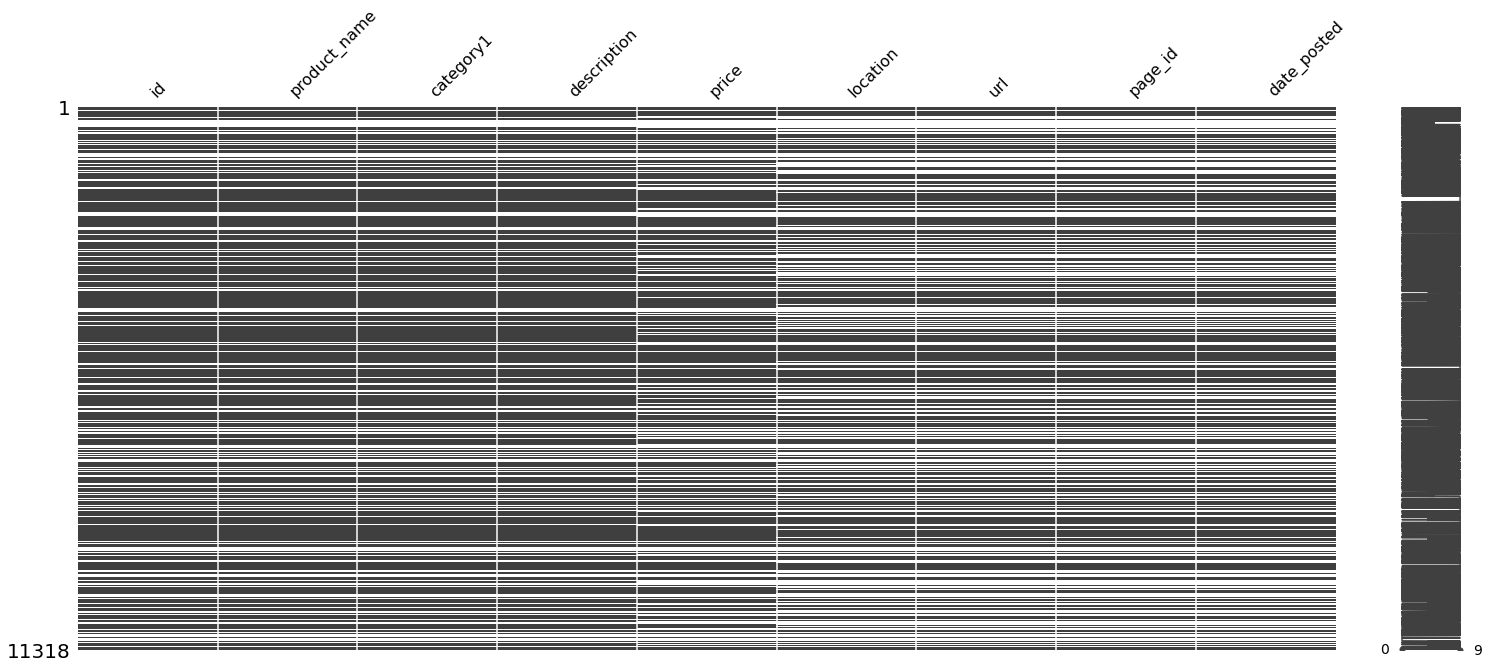

In [126]:
msno.matrix(df)

In [127]:
df.dropna(subset=['id', 'product_name', 'category1', 'description', 'price', 'location', 'url', 'page_id', 'date_posted'], inplace=True)
df.head(25)

,id,product_name,category1,description,price,location,url,page_id,date_posted
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire",https://www.gumtree.com/p/mirrors-clocks-ornam...,1.426705e+09,2022-02-26
1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland",https://www.gumtree.com/p/other-household-good...,1.426705e+09,2022-02-26
2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire",https://www.gumtree.com/p/outdoor-settings-fur...,1.426705e+09,2022-02-26
3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset",https://www.gumtree.com/p/other-dining-living-...,1.426705e+09,2022-02-26
12,5707be4f-49d9-4feb-b2c8-aa0868405c65,"Spotlights | in Newent, Gloucestershire | Gumtree",Home & Garden / Other Household Goods,New in box not needed Spotlights . Posted by s...,£9.00,"Newent, Gloucestershire",https://www.gumtree.com/p/other-household-good...,1.426705e+09,2022-02-26
13,d2244a7b-aef4-4495-aff7-0c55bf512d6e,💥💥White Wardrobe💥💥Brand new Wardrobe For sale ...,Home & Garden / Beds & Bedroom Furniture / War...,🌈🌈Call Dustin 0208-0049437\r\n🌈🌈Same Day Or a...,£419.00,"Huddersfield, West Yorkshire",https://www.gumtree.com/p/wardrobes-shelving-s...,1.426705e+09,2022-02-26
14,485edc04-7bbc-430a-9430-f05a77f5a917,"Letter cage | in Newent, Gloucestershire | Gum...",Home & Garden / Other Household Goods,Selling for family member brand new too big fo...,£10.00,"Newent, Gloucestershire",https://www.gumtree.com/p/other-household-good...,1.426705e+09,2022-02-26
15,7e538445-c75e-4802-8dc5-a9083a802278,"Double Pine Bed Frame | in Lytham St Annes, La...",Home & Garden / Beds & Bedroom Furniture / Dou...,Double Pine bed frame good condition. Reasonab...,£50.00,"Lytham St Annes, Lancashire",https://www.gumtree.com/p/double-beds/double-p...,1.426705e+09,2022-02-26
16,1a64843d-72f3-4141-946f-fa9b978fe755,Solid pine dining table and chairs | in West K...,"Home & Garden / Dining, Living Room Furniture ...",Distressed solid pine table and 4 chairs In ex...,£200.00,"West Kilbride, North Ayrshire",https://www.gumtree.com/p/dining-tables-chairs...,1.424517e+09,2022-02-26
17,ac514199-1ceb-4703-902d-4d8c55bea7e4,Vortex plush velvet corner or 3+2 sofa avialbl...,"Home & Garden / Dining, Living Room Furniture ...",corner Dimension:Width is 212cm x 164cmHeight ...,£449.00,"Wigan, Manchester",https://www.gumtree.com/p/sofas/vortex-plush-v...,1.426704e+09,2022-02-26


<AxesSubplot:>

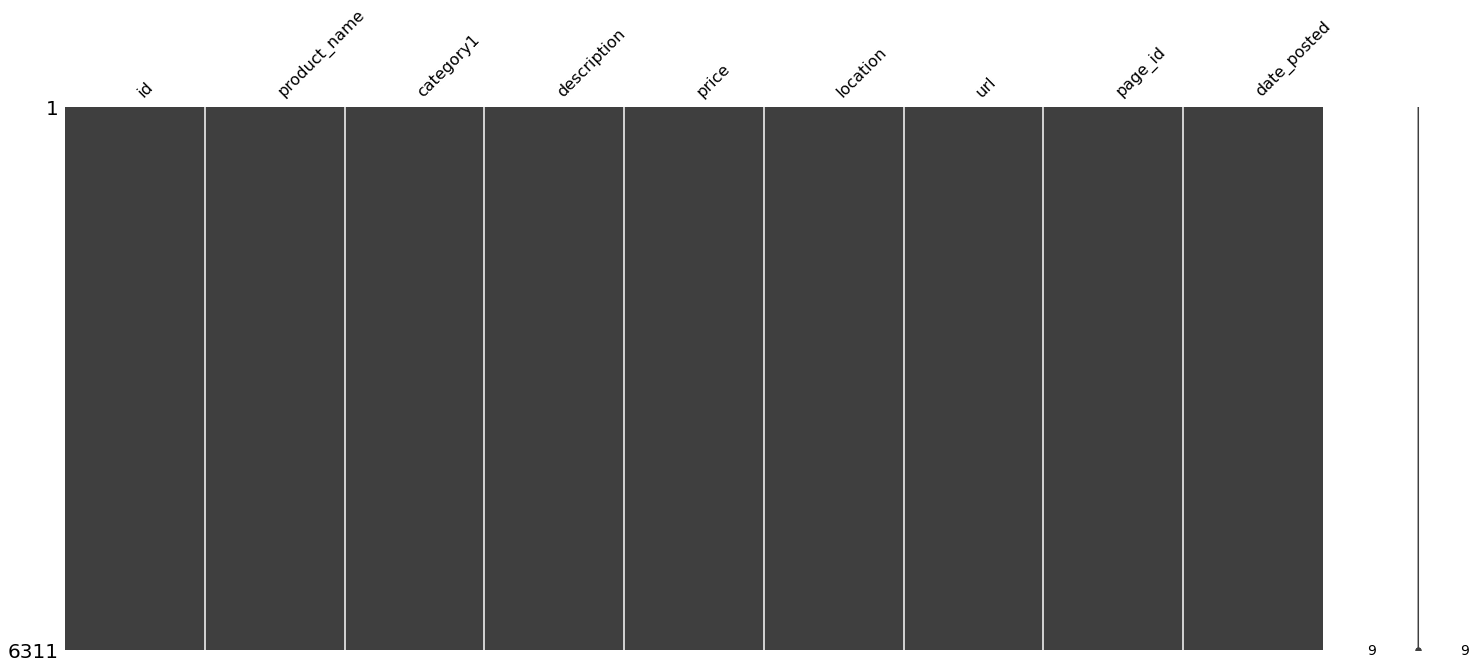

In [128]:
msno.matrix(df)

In [129]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 11317
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6311 non-null   object 
 1   product_name  6311 non-null   object 
 2   category1     6311 non-null   object 
 3   description   6311 non-null   object 
 4   price         6311 non-null   object 
 5   location      6311 non-null   object 
 6   url           6311 non-null   object 
 7   page_id       6311 non-null   float64
 8   date_posted   6311 non-null   object 
dtypes: float64(1), object(8)
memory usage: 493.0+ KB


,id,product_name,category1,description,price,location,url,page_id,date_posted
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire",https://www.gumtree.com/p/mirrors-clocks-ornam...,1.426705e+09,2022-02-26
1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland",https://www.gumtree.com/p/other-household-good...,1.426705e+09,2022-02-26
2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire",https://www.gumtree.com/p/outdoor-settings-fur...,1.426705e+09,2022-02-26
3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset",https://www.gumtree.com/p/other-dining-living-...,1.426705e+09,2022-02-26
12,5707be4f-49d9-4feb-b2c8-aa0868405c65,"Spotlights | in Newent, Gloucestershire | Gumtree",Home & Garden / Other Household Goods,New in box not needed Spotlights . Posted by s...,£9.00,"Newent, Gloucestershire",https://www.gumtree.com/p/other-household-good...,1.426705e+09,2022-02-26


In [130]:
df['price'] = df['price'].str.replace(r'\£','')
df['price'] = df['price'].str.replace(r'\,','')
df.head(12)

/tmp/ipykernel_4810/2954251487.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace(r'\£','')
/tmp/ipykernel_4810/2954251487.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace(r'\,','')


,id,product_name,category1,description,price,location,url,page_id,date_posted
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",5.00,"Wokingham, Berkshire",https://www.gumtree.com/p/mirrors-clocks-ornam...,1.426705e+09,2022-02-26
1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,20.00,"Inverness, Highland",https://www.gumtree.com/p/other-household-good...,1.426705e+09,2022-02-26
2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,20.00,"Skegness, Lincolnshire",https://www.gumtree.com/p/outdoor-settings-fur...,1.426705e+09,2022-02-26
3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,115.00,"Radstock, Somerset",https://www.gumtree.com/p/other-dining-living-...,1.426705e+09,2022-02-26
12,5707be4f-49d9-4feb-b2c8-aa0868405c65,"Spotlights | in Newent, Gloucestershire | Gumtree",Home & Garden / Other Household Goods,New in box not needed Spotlights . Posted by s...,9.00,"Newent, Gloucestershire",https://www.gumtree.com/p/other-household-good...,1.426705e+09,2022-02-26
13,d2244a7b-aef4-4495-aff7-0c55bf512d6e,💥💥White Wardrobe💥💥Brand new Wardrobe For sale ...,Home & Garden / Beds & Bedroom Furniture / War...,🌈🌈Call Dustin 0208-0049437\r\n🌈🌈Same Day Or a...,419.00,"Huddersfield, West Yorkshire",https://www.gumtree.com/p/wardrobes-shelving-s...,1.426705e+09,2022-02-26
14,485edc04-7bbc-430a-9430-f05a77f5a917,"Letter cage | in Newent, Gloucestershire | Gum...",Home & Garden / Other Household Goods,Selling for family member brand new too big fo...,10.00,"Newent, Gloucestershire",https://www.gumtree.com/p/other-household-good...,1.426705e+09,2022-02-26
15,7e538445-c75e-4802-8dc5-a9083a802278,"Double Pine Bed Frame | in Lytham St Annes, La...",Home & Garden / Beds & Bedroom Furniture / Dou...,Double Pine bed frame good condition. Reasonab...,50.00,"Lytham St Annes, Lancashire",https://www.gumtree.com/p/double-beds/double-p...,1.426705e+09,2022-02-26
16,1a64843d-72f3-4141-946f-fa9b978fe755,Solid pine dining table and chairs | in West K...,"Home & Garden / Dining, Living Room Furniture ...",Distressed solid pine table and 4 chairs In ex...,200.00,"West Kilbride, North Ayrshire",https://www.gumtree.com/p/dining-tables-chairs...,1.424517e+09,2022-02-26
17,ac514199-1ceb-4703-902d-4d8c55bea7e4,Vortex plush velvet corner or 3+2 sofa avialbl...,"Home & Garden / Dining, Living Room Furniture ...",corner Dimension:Width is 212cm x 164cmHeight ...,449.00,"Wigan, Manchester",https://www.gumtree.com/p/sofas/vortex-plush-v...,1.426704e+09,2022-02-26


In [132]:
df['id'] = df['id'].astype('string')
df['product_name'] = df['product_name'].astype('string')
df['category1'] = df['category1'].astype('category')
df['description'] = df['description'].astype('string')
df['price'] = df['price'].astype('float')
df['location'] = df['location'].astype('string')
df['url'] = df['url'].astype('string')
df['page_id'] = df['page_id'].astype('string')
df['location'] = df['location'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 11317
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            6311 non-null   string  
 1   product_name  6311 non-null   string  
 2   category1     6311 non-null   category
 3   description   6311 non-null   string  
 4   price         6311 non-null   float64 
 5   location      6311 non-null   string  
 6   url           6311 non-null   string  
 7   page_id       6311 non-null   string  
 8   date_posted   6311 non-null   object  
dtypes: category(1), float64(1), object(1), string(6)
memory usage: 475.5+ KB


In [133]:
print(df.shape)
df.info()
df.head(5)

(6311, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 11317
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            6311 non-null   string  
 1   product_name  6311 non-null   string  
 2   category1     6311 non-null   category
 3   description   6311 non-null   string  
 4   price         6311 non-null   float64 
 5   location      6311 non-null   string  
 6   url           6311 non-null   string  
 7   page_id       6311 non-null   string  
 8   date_posted   6311 non-null   object  
dtypes: category(1), float64(1), object(1), string(6)
memory usage: 475.5+ KB


,id,product_name,category1,description,price,location,url,page_id,date_posted
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",5.0,"Wokingham, Berkshire",https://www.gumtree.com/p/mirrors-clocks-ornam...,1426704584.0,2022-02-26
1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,20.0,"Inverness, Highland",https://www.gumtree.com/p/other-household-good...,1426704579.0,2022-02-26
2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,20.0,"Skegness, Lincolnshire",https://www.gumtree.com/p/outdoor-settings-fur...,1426704576.0,2022-02-26
3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,115.0,"Radstock, Somerset",https://www.gumtree.com/p/other-dining-living-...,1426704575.0,2022-02-26
12,5707be4f-49d9-4feb-b2c8-aa0868405c65,"Spotlights | in Newent, Gloucestershire | Gumtree",Home & Garden / Other Household Goods,New in box not needed Spotlights . Posted by s...,9.0,"Newent, Gloucestershire",https://www.gumtree.com/p/other-household-good...,1426704571.0,2022-02-26


In [134]:
df_test1 = df.loc[df['location'] == 'Wokingham, Berkshire']
df_test1

,id,product_name,category1,description,price,location,url,page_id,date_posted
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",5.0,"Wokingham, Berkshire",https://www.gumtree.com/p/mirrors-clocks-ornam...,1426704584.0,2022-02-26
919,bcf41578-b0db-4773-a9a6-4a6df8892a6e,"Baskets | in Wokingham, Berkshire | Gumtree",Home & Garden / Kitchenware & Accessories / La...,3 silver baskets Baskets . Posted by Nisha in...,15.0,"Wokingham, Berkshire",https://www.gumtree.com/p/laundry-baskets/bask...,1426704878.0,2022-02-26
1369,1eeb4ea4-da40-4bbf-b56d-7d689ae9ef41,"Cutlery wall art | in Wokingham, Berkshire | G...","Home & Garden / Dining, Living Room Furniture ...",Large spoon / fork 75cm tall Cutlery wall art....,20.0,"Wokingham, Berkshire",https://www.gumtree.com/p/paintings-pictures/c...,1426705619.0,2022-02-26
1507,cedc4b34-c8ed-4cf0-9f4a-af8fa5efddb1,"Wall art | in Wokingham, Berkshire | Gumtree","Home & Garden / Dining, Living Room Furniture ...",Large canvas 78cm height115cm width Wall art. ...,15.0,"Wokingham, Berkshire",https://www.gumtree.com/p/paintings-pictures/w...,1426705910.0,2022-02-26
2389,12f30dc6-7d8e-4158-ac61-0bb50bf78472,"Ray Ban Aviator Sunglasses | in Wokingham, Ber...","Clothes, Footwear & Accessories / Sunglasses",Complete with case and cleaning cloth. Immacul...,50.0,"Wokingham, Berkshire",https://www.gumtree.com/p/sunglasses/ray-ban-a...,1426709978.0,2022-02-27
7240,1b404100-e455-4563-b654-e17a9c7632f7,iMac 27inch (5k retina) i9 processor 64gb ram ...,"Computers & Software / Computers, Laptops & Ne...",iMac 27 inch (5K retina) i9 intel processor 64...,3500.0,"Wokingham, Berkshire",https://www.gumtree.com/p/macs/imac-27inch-5k-...,1426412425.0,2022-02-27
10493,4f4efe72-5ea8-4d7f-b162-0f8cc280cc03,"XBox One X with controller, two remotes, all c...",Video Games & Consoles / Consoles / Xbox One,"An used XBox One X. Comes with two remotes, al...",100.0,"Wokingham, Berkshire",https://www.gumtree.com/p/xbox-one/xbox-one-x-...,1426724305.0,2022-02-28


In [143]:
df_test2 = df.loc[df['price'] == 5]
df_test2

,id,product_name,category1,description,price,location,url,page_id,date_posted
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",5.0,"Wokingham, Berkshire",https://www.gumtree.com/p/mirrors-clocks-ornam...,1426704584.0,2022-02-26
44,dcbe214e-cb4b-4f18-ab16-218ec12ab68b,"Love wall art picture | in Fareham, Hampshire ...","Home & Garden / Dining, Living Room Furniture ...","Brand new. Unwanted picture. Approx 90cm wide,...",5.0,"Fareham, Hampshire",https://www.gumtree.com/p/paintings-pictures/l...,1417883197.0,2022-02-26
48,6f228cd8-a2d6-4f23-858b-4a77a2f42d7c,"Next bunny canvas | in Fareham, Hampshire | Gu...","Home & Garden / Dining, Living Room Furniture ...",As new bunny canvas. Approx 50cm x 40cmSmoke a...,5.0,"Fareham, Hampshire",https://www.gumtree.com/p/paintings-pictures/n...,1417719485.0,2022-02-26
50,2275f5f2-ee51-410c-8d85-e5923285a864,Airtight food storage container with dividers ...,Home & Garden / Other Household Goods,This is like a deep divided plate with an airt...,5.0,"Penarth, Vale of Glamorgan",https://www.gumtree.com/p/other-household-good...,1421552385.0,2022-02-26
105,c0e5ef79-09c0-4cb7-9b7c-edd3d53aa530,2 x new jugg nutri pouch systems *£5 for both*...,Home & Garden / Other Household Goods,From a clean smoke free home 2 x new jugg nutr...,5.0,"Kirkcaldy, Fife",https://www.gumtree.com/p/other-household-good...,1426701699.0,2022-02-26
...,...,...,...,...,...,...,...,...,...
11055,0ab5dc20-3b67-41cd-b5c6-acd342cf1122,Xbox gaming bundle - Brute Force and Ninja Gai...,Video Games & Consoles / Consoles / Xbox 360 &...,Xbox gaming bundle - Brute Force and Ninja Gai...,5.0,"Chepstow, Monmouthshire",https://www.gumtree.com/p/xbox-360/xbox-gaming...,1419146438.0,2022-02-28
11124,19f74a92-493c-4fba-b365-5c0afc87f6b6,6 PS2 games bundle sports football skating cri...,Video Games & Consoles / Games,All games complete with case and manualsAll di...,5.0,"Pontcanna, Cardiff",https://www.gumtree.com/p/video-games/6-ps2-ga...,1426706888.0,2022-02-28
11178,1fbc2459-5612-46c5-a63e-f71df5fdd267,"Steep | in Horsham, West Sussex | Gumtree",Video Games & Consoles / Games,The item has been used Steep . Posted by Bradl...,5.0,"Horsham, West Sussex",https://www.gumtree.com/p/video-games/steep-/1...,1406177378.0,2022-02-28
11215,e6210bb6-31fa-4e06-a96b-2177b3fc230a,"Xbox 360 controllers | in Banbury, Oxfordshire...",Video Games & Consoles / Video Game Accessorie...,Old Xbox 360 controllersX1 wired blackX2 wirel...,5.0,"Banbury, Oxfordshire",https://www.gumtree.com/p/video-games-controll...,1426703735.0,2022-02-28


In [144]:
print(df['category1'].nunique())
df.category1.unique()

422


['Home & Garden / Dining, Living Room Furniture..., 'Home & Garden / Other Household Goods', 'Home & Garden / Garden & Patio / Outdoor Sett..., 'Home & Garden / Dining, Living Room Furniture..., 'Home & Garden / Beds & Bedroom Furniture / Wa..., ..., 'Video Games & Consoles / Consoles / Nintendo ..., 'Video Games & Consoles / Video Game Accessori..., 'Video Games & Consoles / Consoles / Nintendo ..., 'Video Games & Consoles / Consoles / PS2 & PS1..., 'Video Games & Consoles / Consoles / PSP (Sony...]
Length: 422
Categories (422, object): ['Appliances / Dishwashers', 'Appliances / Freezers', 'Appliances / Fridge Freezers', 'Appliances / Health & Beauty Appliances / Den..., ..., 'Video Games & Consoles / Video Game Accessori..., 'Video Games & Consoles / Video Game Accessori..., 'Video Games & Consoles / Video Game Accessori..., 'Video Games & Consoles / Video Game Accessori...]

In [145]:
df.to_csv('cleaned_tabular_data.csv')

In [ ]:
# df[['category2','category3']] = df.category1.str.split('/',n=2,expand=True,)
# df